In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from gensim import corpora, models

# Initialize nltk components
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Load datasets
game_data = pd.read_csv("https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Aaron/refs/heads/main/data/all_studies_game_data.csv")
round_data = pd.read_csv("https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Aaron/refs/heads/main/data/all_studies_round_data.csv")

# Inspect datasets
print("Game Data Preview:")
print(game_data.head())
print("\nRound Data Preview:")
print(round_data.head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Game Data Preview:
             game_id            condition  round_index  independent_wisdom  \
0  LtnXEGCJzhBnyARpj  dynamic_no_feedback            1            0.486667   
1  LtnXEGCJzhBnyARpj  dynamic_no_feedback            2            0.724167   
2  LtnXEGCJzhBnyARpj  dynamic_no_feedback            3            0.596667   
3  LtnXEGCJzhBnyARpj  dynamic_no_feedback            4            0.489167   
4  LtnXEGCJzhBnyARpj  dynamic_no_feedback            5            0.439167   

   revised_wisdom  revised_wisdom_error  independent_wisdom_error  \
0        0.570000              0.480000                  0.396667   
1        0.807500              0.027500                  0.055833   
2        0.487500              0.422500                  0.313333   
3        0.470833              0.000833                  0.019167   
4        0.408333              0.328333                  0.359167   

   correct_answer  task_instance_avg_error  top_1_ind  ...  top_12_rev  \
0            0.09      

##Implement NLP methods

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-13-6428b2f0a0cc>:44: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from current font.
  plt.tight_layout()
<ipython-input-13-6428b2f0a0cc>:44: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  plt.tight_layout()
<ipython-input-13-6428b2f0a0cc>:44: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) missing from current font.
  plt.tight_layout()
<ipython-input-13-6428b2f0a0cc>:44: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from current font.
  plt.tight_layout()
<ipython-input-13-6428b2f0a0cc>:44: UserWarning: Glyph 24773 (\N{CJK UNIFIED IDEOGRAPH-60C5}) missing from current font.
  plt.tight_layout()
<ipython-input-13-6428b2f0a0cc>:44: UserWarning: Glyph 24863 (\N{CJK UNIFIED IDEOGRAPH-611F}) missing from current font.
  plt.tight_layout()
<ipython-input-13-642

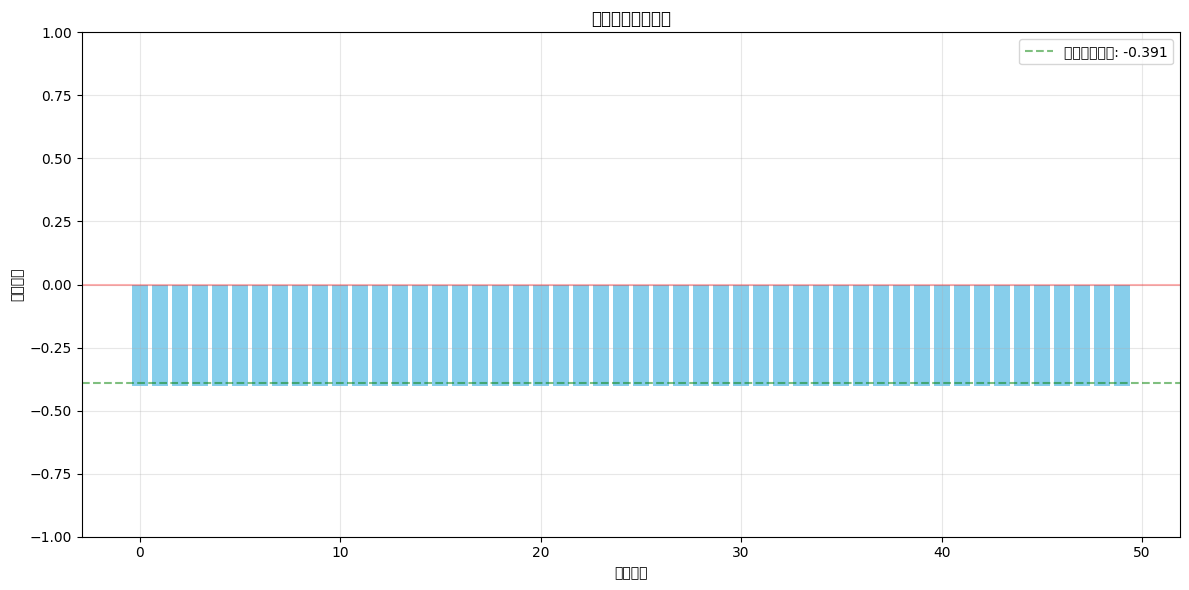


情感分数统计:
count    13700.000000
mean        -0.390919
std          0.063322
min         -0.401900
25%         -0.401900
50%         -0.401900
75%         -0.401900
max         -0.025800
Name: sentiment_score, dtype: float64


In [13]:
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import nltk

nltk.download('vader_lexicon')


game_data_url = "https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Aaron/refs/heads/main/data/all_studies_game_data.csv"
game_data = pd.read_csv(game_data_url)


game_data['text_for_sentiment'] = game_data.apply(
    lambda row: f"Score {row['revised_wisdom']} with error {row['revised_wisdom_error']} in condition {row['condition']}",
    axis=1
)

# 初始化情感分析器
sia = SentimentIntensityAnalyzer()

# 计算情感分数
game_data['sentiment_score'] = game_data['text_for_sentiment'].apply(
    lambda x: sia.polarity_scores(x)['compound']
)

# 创建可视化
plt.figure(figsize=(12, 6))
plt.bar(range(50), game_data['sentiment_score'][:50], color='skyblue')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.xlabel('样本序号')
plt.ylabel('情感分数')
plt.title('样本情感分数分布')
plt.ylim(-1, 1)
plt.grid(True, alpha=0.3)

# 添加平均值线
mean_sentiment = game_data['sentiment_score'].mean()
plt.axhline(y=mean_sentiment, color='g', linestyle='--', alpha=0.5,
            label=f'平均情感分数: {mean_sentiment:.3f}')
plt.legend()

plt.tight_layout()
plt.show()

# 打印一些统计信息
print("\n情感分数统计:")
print(game_data['sentiment_score'].describe())


##Prediction Task

In [14]:

# Use features and target for supervised learning (replace columns as needed)
features = ['independent_wisdom', 'revised_wisdom', 'task_instance_avg_error', 'sentiment_score']
target = 'revised_wisdom_error'

# Drop rows with missing values in selected columns
game_data = game_data.dropna(subset=features + [target])

X = game_data[features]
y = game_data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.01103467347684125
R-squared: 0.04160679428007841
